In [45]:
import pandas as pd
import numpy as np
import seaborn as sbn
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [46]:
!nvidia-smi


Mon Apr 15 07:17:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [47]:
from google.colab import files
uploaded = files.upload ()

Saving isear-test.xlsx to isear-test (1).xlsx


In [66]:
df.head ()

,Emotions,Text
0,joy,My first feeling of falling in love. Coming a...
1,joy,When I saw that the mark I had obtained in an ...
2,joy,When I learnt that I had been admitted to the ...
3,anger,In a hurry to get to lectures and the car woul...
4,guilt,"Not attending school, when am not sick - but ..."


In [65]:
custom_headers = ['Emotions', 'Text']

df = pd.read_excel('isear-test.xlsx',skiprows=1, header=None, names =custom_headers)

In [67]:
df['Emotions'].value_counts()

Emotions
shame      182
fear       168
anger      166
disgust    166
sadness    161
guilt      155
joy        152
Name: count, dtype: int64

<Axes: xlabel='Emotions', ylabel='count'>

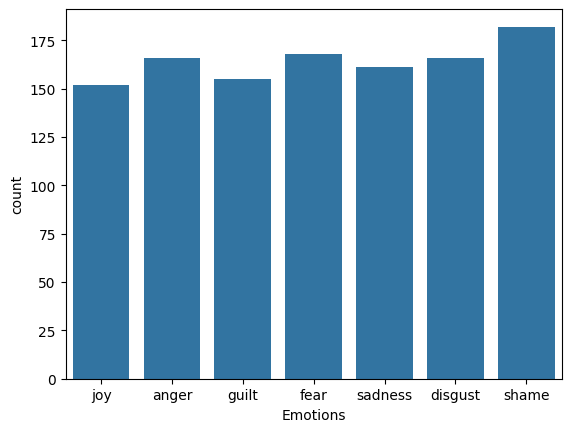

In [68]:
sbn.countplot (x='Emotions', data =df)

In [53]:
df['Text'] = df['Text'].str.lower ()

In [54]:
print(df['Text'].dtype)

object


In [55]:
df['Text'] = df['Text'].str.replace(r'[^\w\s]', '')

In [56]:
print (df['Text'])

0                                                    text
1       my first feeling of falling in love.  coming a...
2       when i saw that the mark i had obtained in an ...
3       when i learnt that i had been admitted to the ...
4       in a hurry to get to lectures and the car woul...
                              ...                        
1146     once i saw some children hunting a cat to death.
1147                       being insulted by my roommate.
1148    i had a habit of wetting my bed when i was you...
1149     when i was selected to the university of zambia.
1150    when i learnt that i had been accepted at the ...
Name: Text, Length: 1151, dtype: object


In [57]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print (stop_words)

{'me', 'o', "shan't", 'be', 'so', "mightn't", 'being', 'we', "doesn't", 'mightn', 'to', 'am', "hadn't", 'yourself', 'those', 'other', 'what', 'at', 'up', 'above', 've', "you're", 'was', 'into', 'through', 'on', "shouldn't", 'will', 'down', 'them', 'ma', "she's", 'by', 'or', 'our', 'whom', 'himself', "don't", 'in', 'doesn', 'again', 'herself', 'hasn', 'couldn', 're', 'nor', 'about', 'weren', 'during', 'just', "you'd", 'than', 'here', 'that', 'for', 's', 'your', 'are', "that'll", 'where', 'any', 'don', 'a', 'aren', "won't", 'you', 'won', 'yours', 'wouldn', "hasn't", 'wasn', 'ain', 'ourselves', 'until', 'she', "wasn't", 'too', 'before', "needn't", 'shouldn', 'own', 'both', 'the', 'd', 'with', 'below', "haven't", 'i', 'its', 'isn', 'as', 'is', "aren't", 'do', 'very', 'hers', 'he', 'been', 'how', 'mustn', 'if', 'only', 'there', 'same', 'needn', 'themselves', "you'll", 'not', 'has', 'does', 'between', 'hadn', 'their', 'most', 'out', 'from', 't', 'all', 'further', 'my', "it's", "mustn't", 'yo

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [58]:
"""nltk.download('punkt')
df['Text'] = df['Text'].apply(nltk.word_tokenize)
print(df['Text'])"""

"nltk.download('punkt')\ndf['Text'] = df['Text'].apply(nltk.word_tokenize)\nprint(df['Text'])"

In [59]:
labels = df['Emotions']
texts = df['Text']

In [60]:
!pip install scikit-learn


In [61]:
import sklearn
print(sklearn.__version__)
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


1.2.2


In [62]:
pipeline_lr = Pipeline(steps=[
    ('cv', CountVectorizer()),
    ('lr', LogisticRegression())
])

pipeline_lr.fit(texts, labels)

accuracy = pipeline_lr.score(texts, labels)
print("Accuracy:", accuracy)

Accuracy: 0.9852302345786272


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
pipeline_svm = Pipeline(steps=[
    ('cv', CountVectorizer()),
    ('svm', SVC())
])
pipeline_svm.fit(texts, labels)
accuracy = pipeline_svm.score(texts, labels)
print("Accuracy:", accuracy)

Accuracy: 0.8566463944396178


In [64]:
from sklearn.metrics import f1_score

predicted_labels_train = pipeline_lr.predict(texts)

f1_train = f1_score(labels, predicted_labels_train, average='weighted')
print("F1-score on training data:", f1_train)

F1-score on training data: 0.9848888031592042
